In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# loading dataset
df = pd.read_csv('../data/indie_music/train_data.csv')
print(df.describe())

            tempo  danceability      energy    loudness  acousticness  \
count  400.000000    400.000000  400.000000  400.000000    400.000000   
mean   120.305141      0.542240    0.656438  -29.656965      0.492097   
std     24.001179      0.201011    0.207860   17.321927      0.281735   
min     80.404927      0.207697    0.303458  -59.806904      0.001565   
25%     99.476424      0.361433    0.461995  -44.948971      0.274523   
50%    121.554346      0.532504    0.678438  -28.875966      0.486834   
75%    142.182289      0.722163    0.840092  -14.670381      0.720051   
max    159.240411      0.899802    0.999590   -0.099149      0.995438   

         duration_ms  speechiness  popularity  
count     400.000000   400.000000  400.000000  
mean   225265.570000     0.347344   23.955611  
std     42937.988851     0.199562   13.939081  
min    150276.000000     0.001394    0.000000  
25%    189058.250000     0.173720   13.991443  
50%    224735.000000     0.355203   23.736604  
75%   

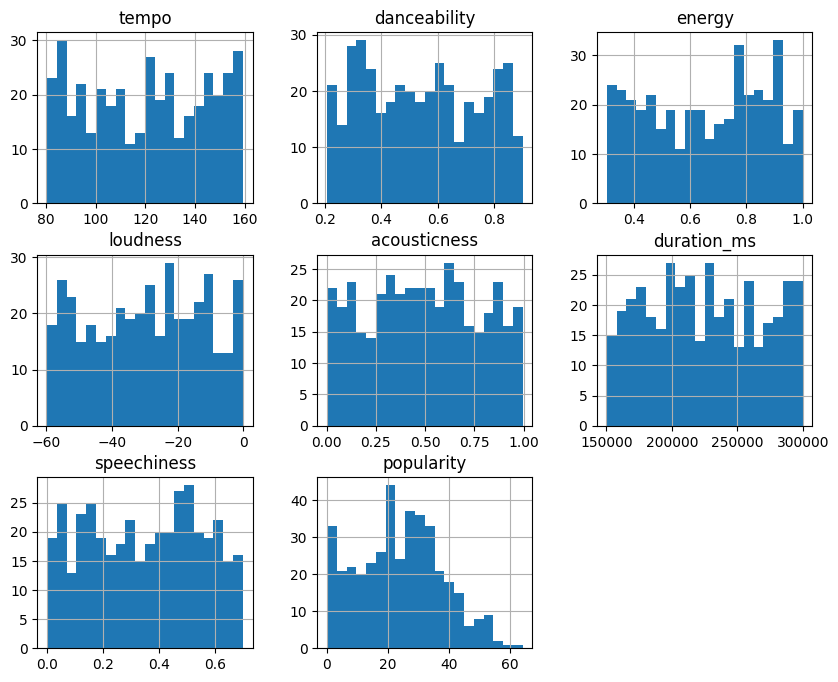

In [8]:
# Histogram for each feature
df.hist(figsize=(10, 8), bins=20)
plt.show()

#### would generate a matrix of scatter plots:
- energy vs. popularity → Shows whether higher energy levels lead to more popular songs.
- danceability vs. popularity → Checks if more danceable songs tend to be popular.
- tempo vs. popularity → See if song tempo affects popularity.
- Diagonal plots (histograms) → Show the distribution of each feature.
#### Interpreting the Output
1. If you see upward trends in scatter plots, it means there’s a positive correlation.
2. If you see downward trends, there’s a negative correlation.
3. If points are randomly scattered, there might be no relationship.

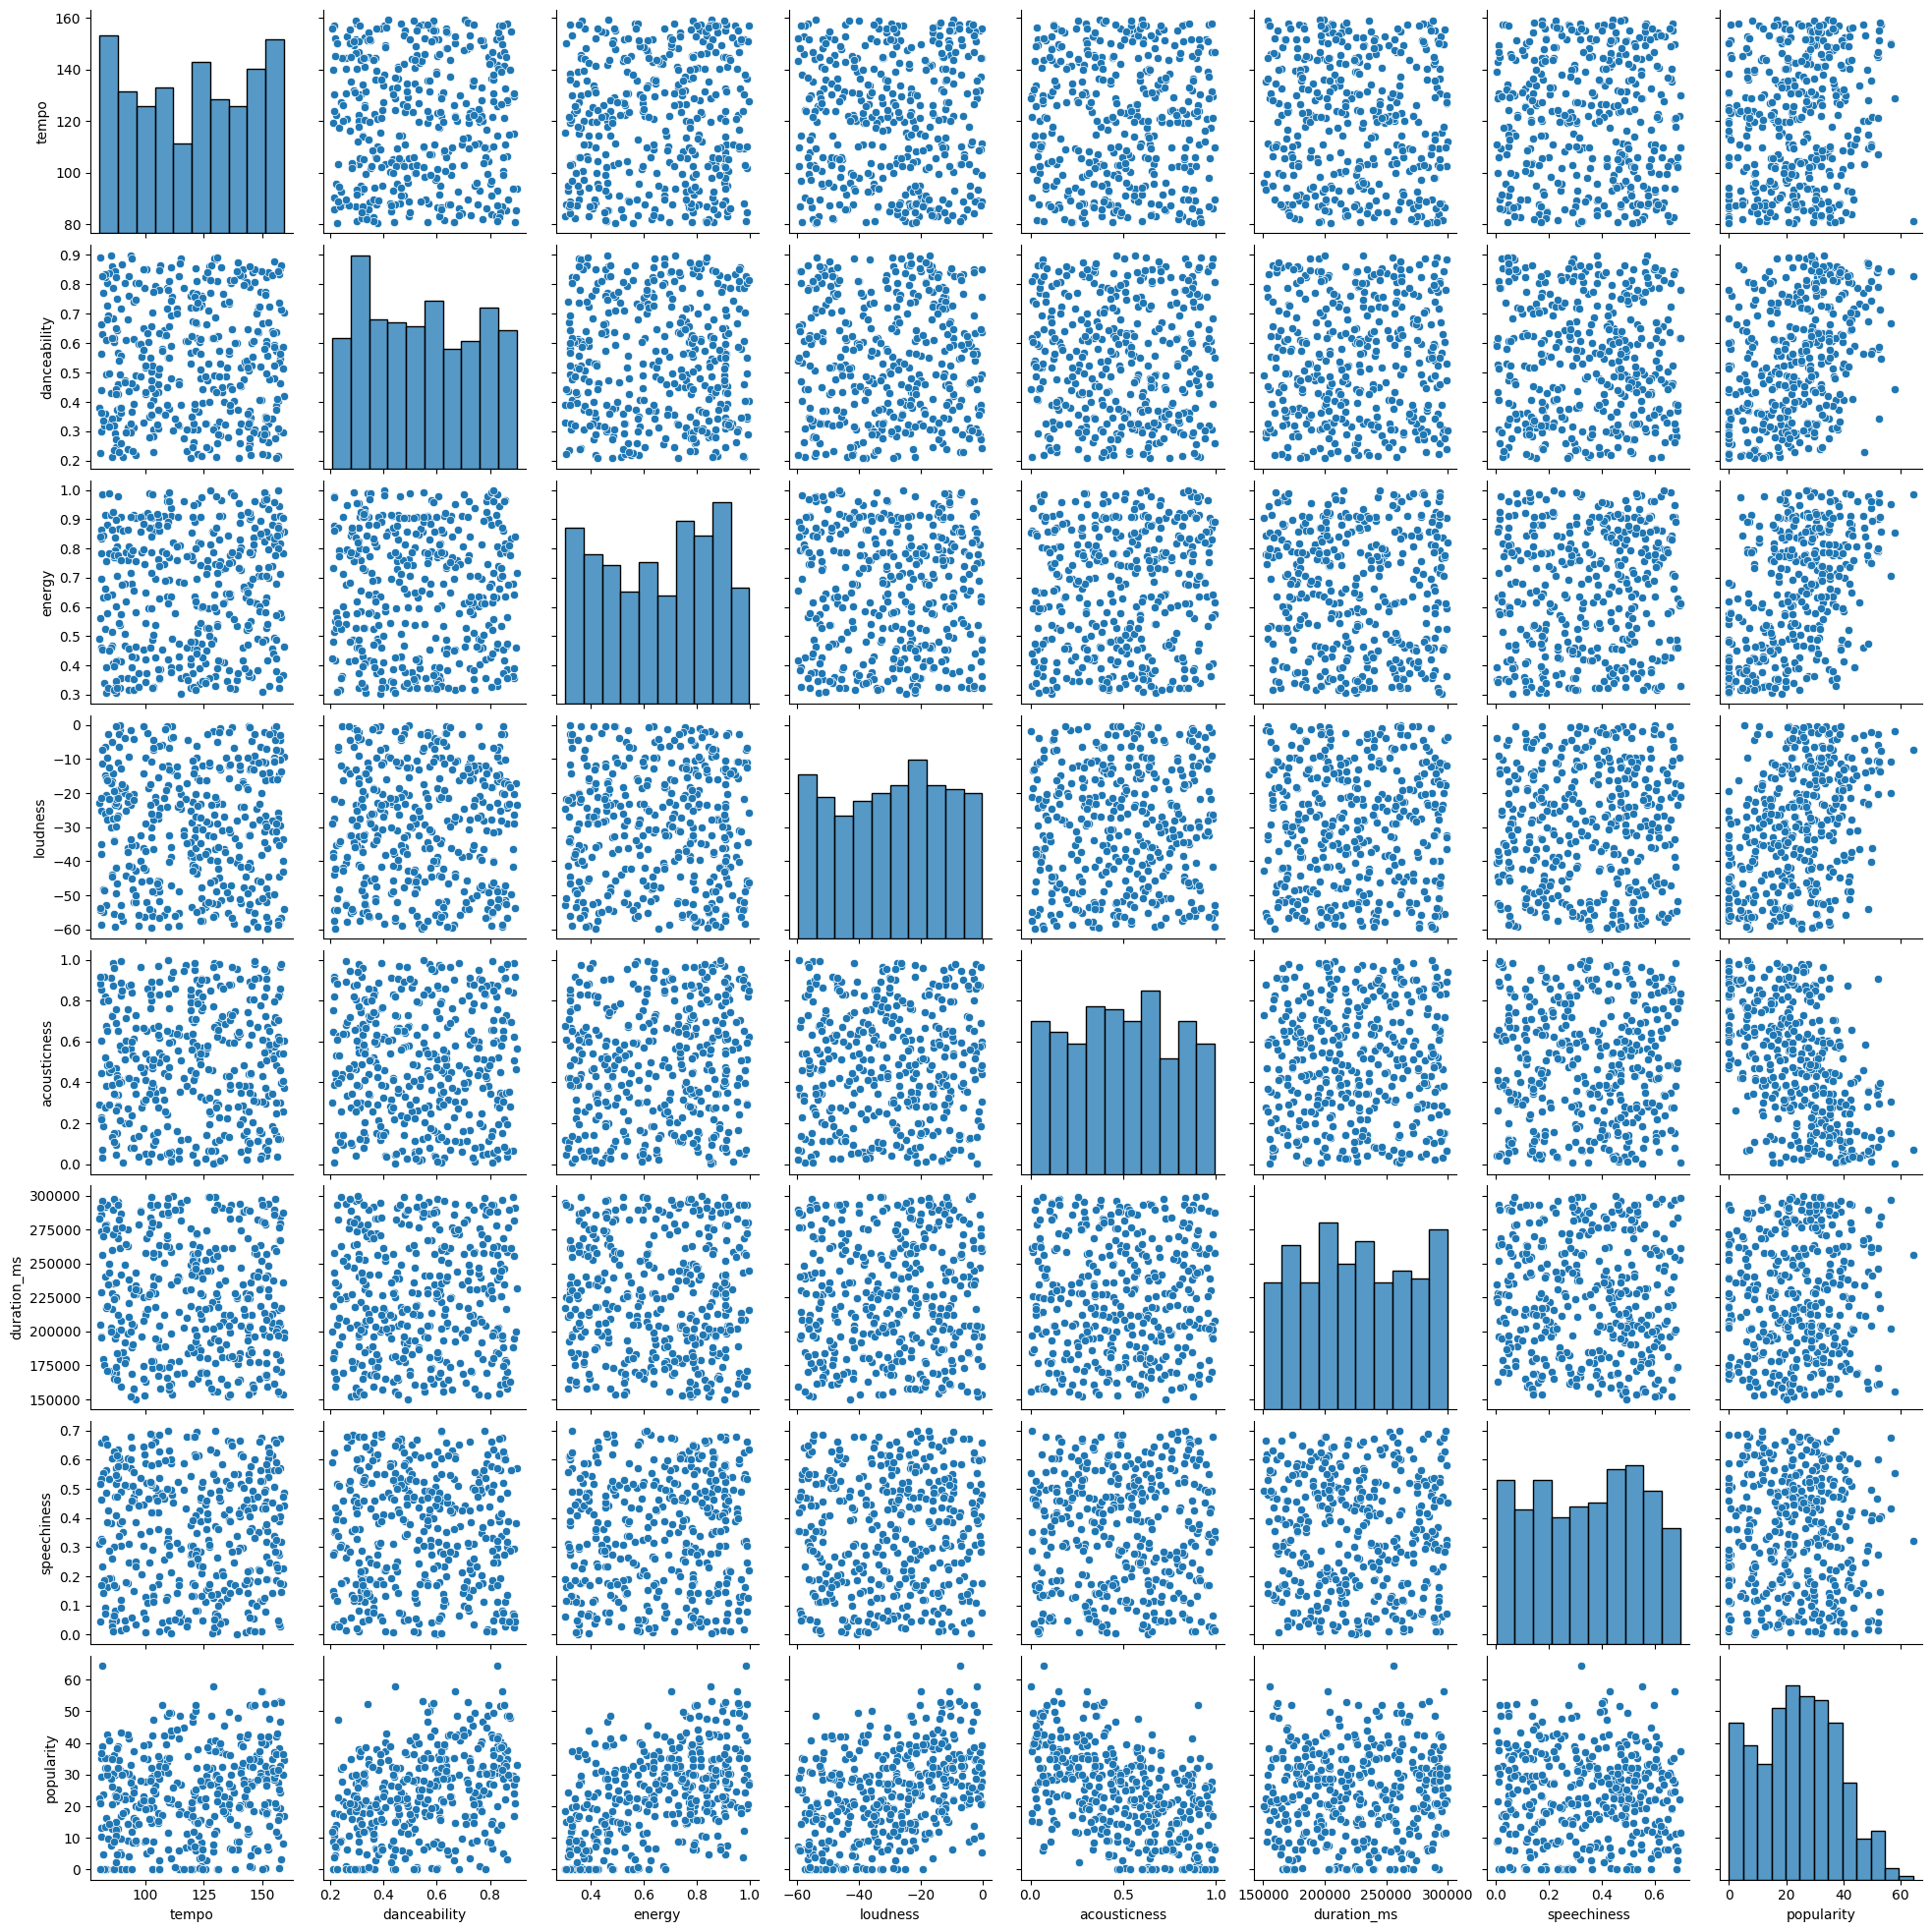

In [10]:
sns.pairplot(df)
plt.show()


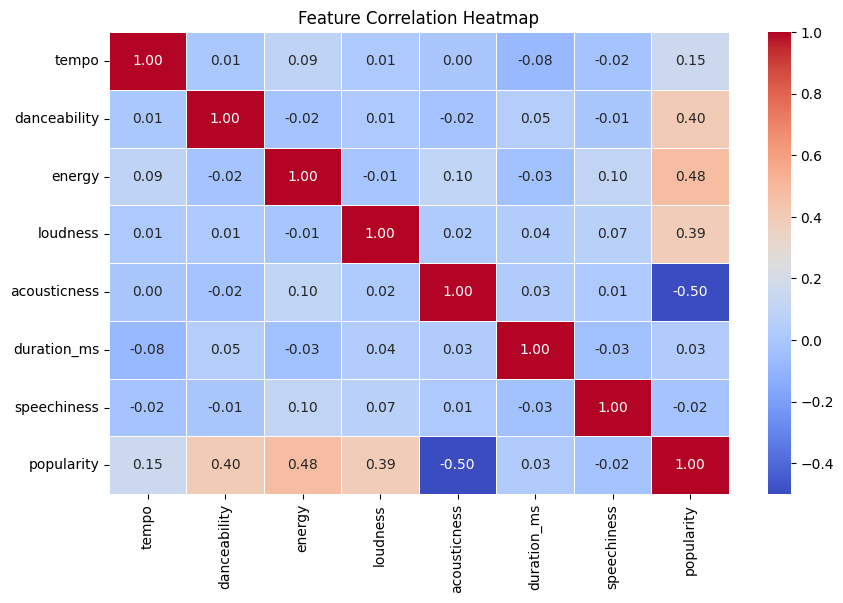

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


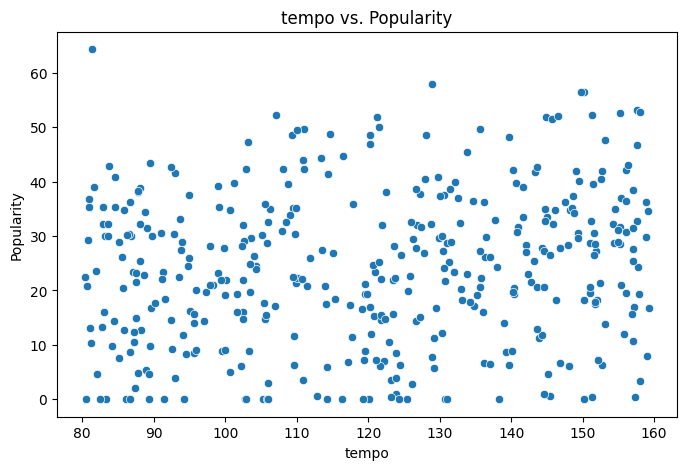

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["tempo"], y=df["popularity"])
plt.xlabel("tempo")
plt.ylabel("Popularity")
plt.title("tempo vs. Popularity")
plt.show()


### Training the model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
X = df.drop(columns=["popularity"])
y = df["popularity"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.1880173500684865
Mean Squared Error: 27.823060228383845


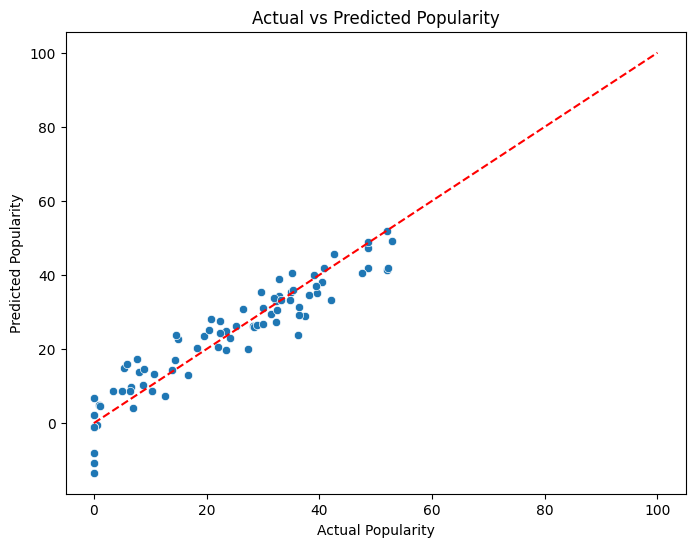

In [21]:

# Scatter plot of actual vs predicted popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 100], [0, 100], color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.show()


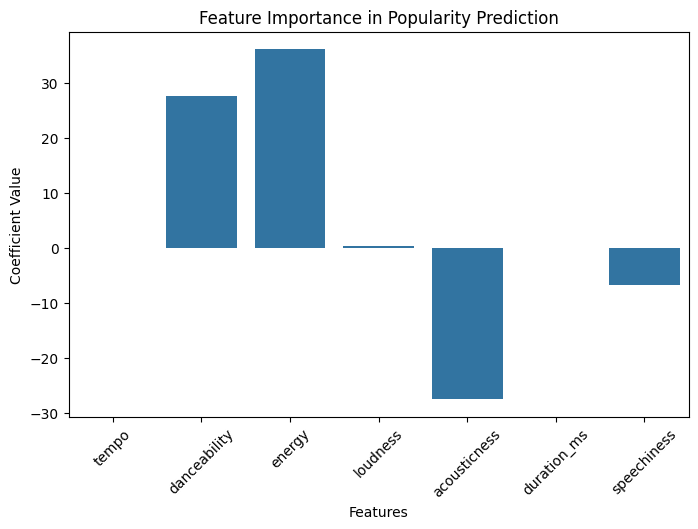

In [23]:
importance = model.coef_

plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=importance)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Popularity Prediction")
plt.show()
